In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset of books
df=pd.read_csv(r"C:\Users\hp\Downloads\BOOK rec proj\Data\Book_FinalData - Copy.csv")
df.head()

,URL,Book_Name,Author,Price,Genre,Category,Sub-Category
0,https://d34a0mln2492j4.cloudfront.net/unsigned...,Illuminati Basics,Vinay Rajendra Dolase,105.0,Non-Fiction,History,Ancient
1,https://d34a0mln2492j4.cloudfront.net/unsigned...,How the Great Pyramid Was Built,Craig B. Smith,2024.0,Non-Fiction,History,Ancient
2,https://d34a0mln2492j4.cloudfront.net/unsigned...,Hannibal: The African Warrior,Jacob Abbott,659.0,Non-Fiction,History,Ancient
3,https://d34a0mln2492j4.cloudfront.net/unsigned...,Hebrews: A Blackaby Bible Study Series (Encoun...,Thomas Blackaby,648.0,Non-Fiction,History,Ancient
4,https://d34a0mln2492j4.cloudfront.net/unsigned...,Philippians: A Blackaby Bible Study Series (En...,Thomas Blackaby,813.0,Non-Fiction,History,Ancient


In [3]:
# Columns in Dataset
df.columns

Index(['URL', 'Book_Name', 'Author', 'Price', 'Genre', 'Category',
       'Sub-Category'],
      dtype='object')

In [4]:
# Shape of Data
df.shape

(210181, 7)

In [5]:
# All the information about data and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210181 entries, 0 to 210180
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   URL           210181 non-null  object 
 1   Book_Name     207215 non-null  object 
 2   Author        209764 non-null  object 
 3   Price         209924 non-null  float64
 4   Genre         210181 non-null  object 
 5   Category      210181 non-null  object 
 6   Sub-Category  204840 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.2+ MB


In [6]:
# Checking Whether Book names are unique are not 
df['Book_Name'].nunique()

180790

In [7]:
# Since there are dublicate names we will drop dublicate names
df = df.loc[df['Book_Name'].drop_duplicates(keep='first').index]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180791 entries, 0 to 210180
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   URL           180791 non-null  object 
 1   Book_Name     180790 non-null  object 
 2   Author        180644 non-null  object 
 3   Price         180791 non-null  float64
 4   Genre         180791 non-null  object 
 5   Category      180791 non-null  object 
 6   Sub-Category  178243 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.0+ MB


In [9]:
#df.drop('Unnamed: 0',axis=1)

In [10]:
# Taking Value Counts of Genre
print(df['Genre'].value_counts())

Genre
Non-Fiction              52165
Fiction                  51166
Non Fiction              49437
Young Adults             14756
Children                  8122
Comics,Graphic Novels     3151
Language                  1994
Name: count, dtype: int64


In [11]:
# Replacing values in column Genre
df['Genre']=df['Genre'].replace('Non Fiction','Non-Fiction')
print(df['Genre'].value_counts())

Genre
Non-Fiction              101602
Fiction                   51166
Young Adults              14756
Children                   8122
Comics,Graphic Novels      3151
Language                   1994
Name: count, dtype: int64


In [12]:
#Checking null values in data
df.isna().sum()

URL                0
Book_Name          1
Author           147
Price              0
Genre              0
Category           0
Sub-Category    2548
dtype: int64

In [13]:
# remove rows with null values
df.dropna(inplace=True)
df.isna().sum()

URL             0
Book_Name       0
Author          0
Price           0
Genre           0
Category        0
Sub-Category    0
dtype: int64

In [14]:
df.shape

(178096, 7)

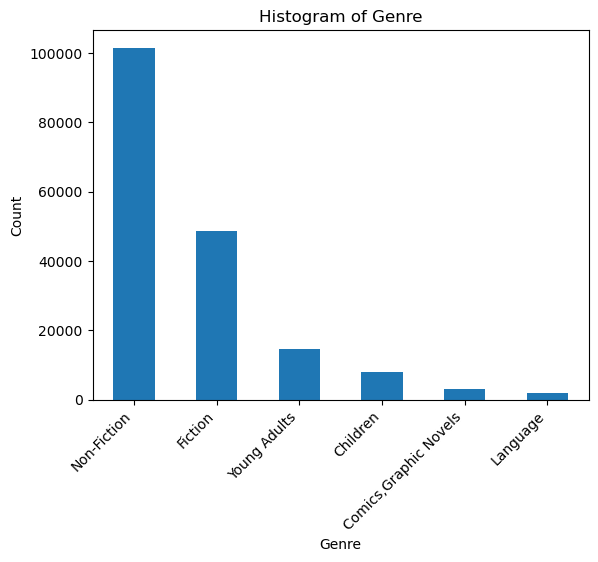

In [15]:
# Histogram for Genre wise Books
df['Genre'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Histogram of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()



### Interpretation :
From the above graph we can observe that data set contains mostly books of Non-Fiction genre

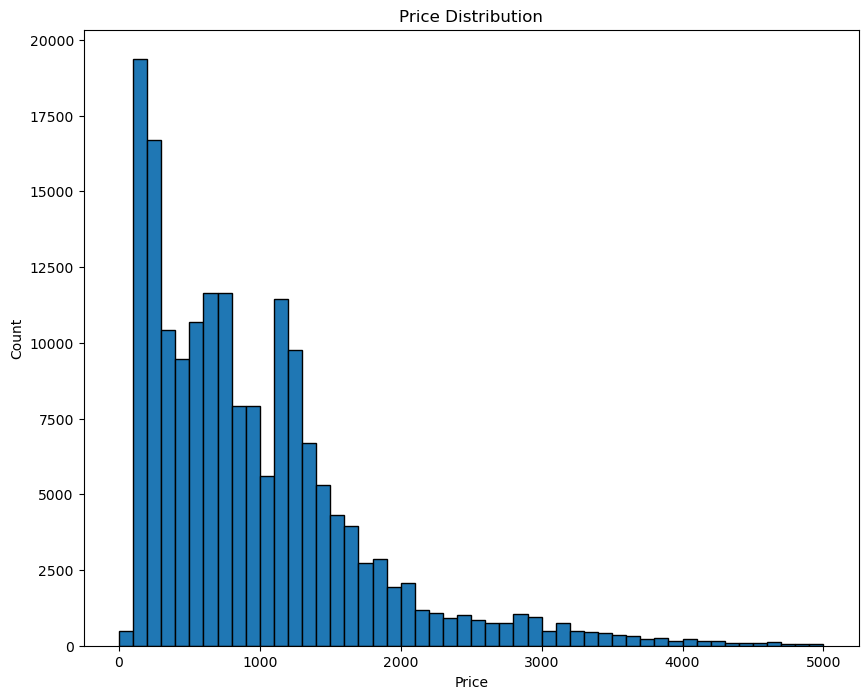

In [16]:
# Histogram to check price distribution of data
plt.figure(figsize=(10, 8))
plt.hist(df['Price'], bins=range(0, 5100, 100), edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

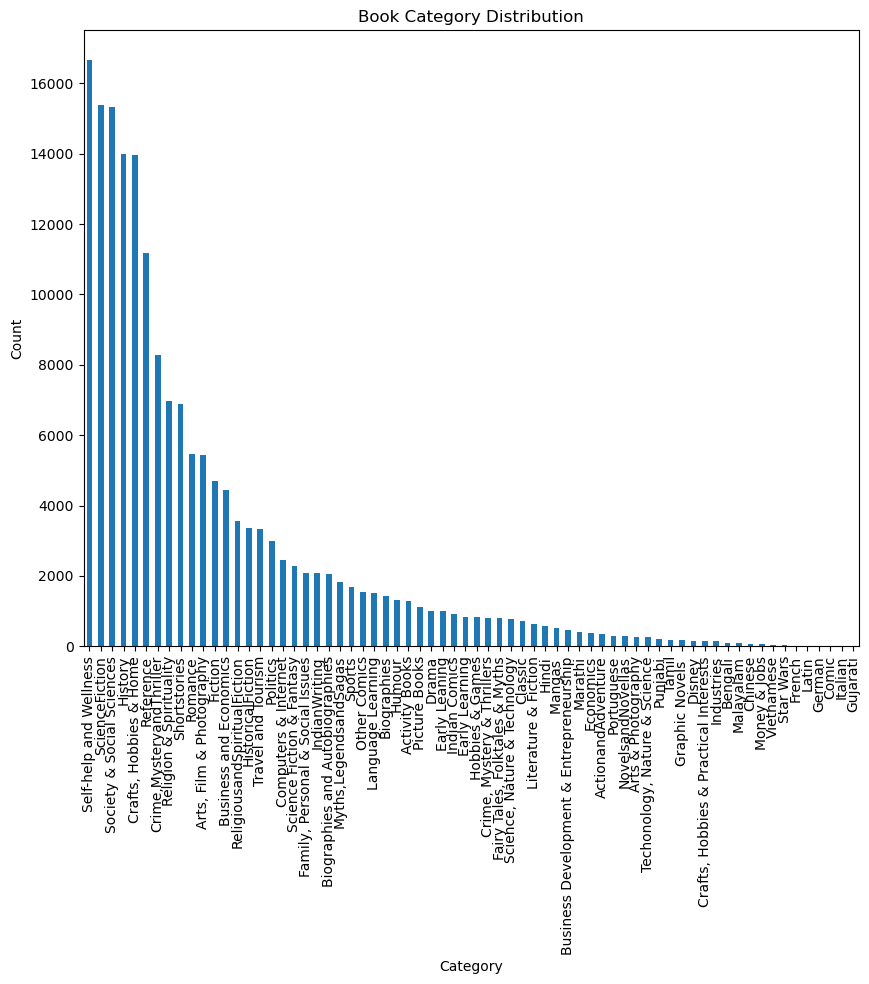

In [17]:
# Bar chart for Category wise book distribution
plt.figure(figsize=(10, 8))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Book Category Distribution')
plt.show()

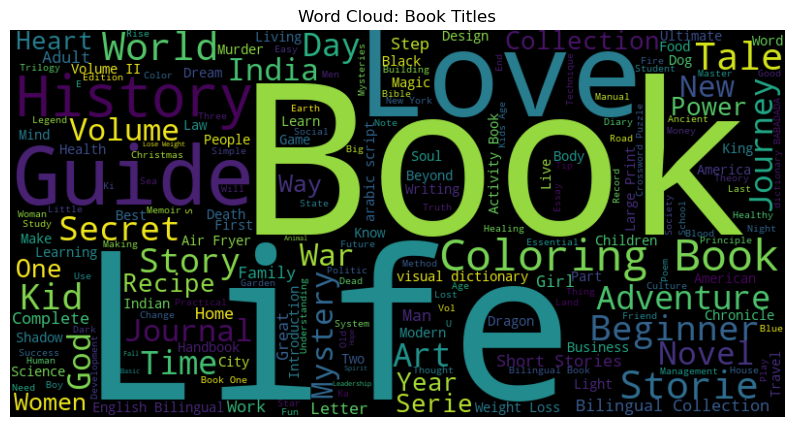

In [18]:
# Wordcloud 
from wordcloud import WordCloud
text = ' '.join(df['Book_Name'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Book Titles')
plt.show()